In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os

from glob import glob
from datetime import datetime
from matplotlib.patches import  Polygon
from matplotlib.collections import PatchCollection

from utils import fileio
from utils import geometry

In [98]:
def make_polygon(i, C, R, cell_centres):
    """
    Generate polygon

    Parameters:
    i (int): cell id
    C (numpy array): Nc x Nv order array relating cells to vertices
    R (numpy array): vertex coordinates
    cell_centres (numpy array): cell centre coordinates
    """

    Ralpha=R[np.where(C[i,:]==1)[0]]-cell_centres[i] #ref frame of cell
    ang=np.arctan2(Ralpha[:,1], Ralpha[:,0])%(2*np.pi) #find angle with x axis
    R_ang=np.transpose(np.vstack((np.where(C[i,:]==1)[0], ang))) #stack index of vertices with angle
    ordered_vertices=R_ang[np.argsort(R_ang[:,-1], axis=0)] #sort by anticlockwise angle
    polygon = Polygon(R[ordered_vertices[:,0].astype(int)],closed = True)
    return polygon

def plot_edges(A, R):
    N_e=np.shape(A)[0]
    beg_edge = ((abs(A) - A)*0.5)@R
    end_edge = ((abs(A) + A)*0.5)@R
    for j in range(0,N_e):
        if (beg_edge[j,0]!=0) and (end_edge[j, 0]!=0):
            plt.plot([beg_edge[j,0],end_edge[j,0]],[beg_edge[j,1],end_edge[j,1]],'k',alpha=1.0,linestyle ='-')

def plot_cell_centres(cell_centres):
    for i in range(len(cell_centres)):
        plt.plot(cell_centres[i,0],cell_centres[i,1],'k',marker ='o',markersize=1)
        
def plot_cell_id(cell_centres):
    for i in range(len(cell_centres)):
        plt.text(cell_centres[i][0], cell_centres[i][1], str(i),fontsize= 5,color='w', horizontalalignment='center', verticalalignment='center')

def plot_alignment_axis(cell_centres,alignment_axis):
    for i in range(len(cell_centres)):
            plt.quiver(cell_centres[i,0],cell_centres[i,1],np.cos(alignment_axis)[i],np.sin(alignment_axis)[i],facecolor = 'black',scale=110,width=0.002,headwidth=0.0,headlength=0.0,headaxislength=0.0)
            plt.quiver(cell_centres[i,0],cell_centres[i,1],-np.cos(alignment_axis)[i],-np.sin(alignment_axis)[i],facecolor = 'black',scale=110,width=0.002,headwidth=0.0,headlength=0.0,headaxislength=0.0)



def plot_polys(C, R, cell_centres):
    N_c=np.shape(C)[0]
    patches = []

    for i in range(N_c):
        polygon = make_polygon(i, C, R, cell_centres)
        patches.append(polygon)

    p = PatchCollection(patches,alpha = 1.0)
    return p

def plot_binary_polys(C, R, cell_centres, plot_var, threshold):
    N_c=np.shape(C)[0]
    patches = []
    patchesLow = []
    patchesHigh = []

    for i in range(N_c):
        polygon = make_polygon(i, C, R, cell_centres)
        patches.append(polygon)
        
        if plot_var[i] < threshold:
            polygonLow = polygon
            patchesLow.append(polygonLow)
        else:
            polygonHigh = polygon
            patchesHigh.append(polygonHigh)


    ### For binary effective pressure
    p_low = PatchCollection(patchesLow,alpha = 0.5)
    p_high = PatchCollection(patchesHigh,alpha = 0.7)
   
    return p_low, p_high


In [112]:
pixel_size=1024
micron_size=554.11

data_t_0=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230126_2_IN_CheHis-BFPCAAX_uf_0p5_MP_fr1\\2023-06-22_15-51-38\\Data\\20230126_2_fr1_cell_data_all_Gamma_0.172_Lambda_-0.259.csv')
data_t_300=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230126_2_IN_CheHis-BFPCAAX_uf_8p6_MP_fr1\\2023-06-22_22-42-33\\Data\\20230126_2_fr1_cell_data_all_Gamma_0.172_Lambda_-0.259.csv')
data_t_600=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230126_2_IN_CheHis-BFPCAAX_uf_8p6a_MP_fr6\\2023-06-24_14-26-37\\Data\\20230126_2_fr6_cell_data_all_Gamma_0.172_Lambda_-0.259.csv')
data_t_900=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230126_2_IN_CheHis-BFPCAAX_uf_8p6a_MP_fr11\\2023-06-24_18-12-27\\Data\\20230126_2_fr11_cell_data_all_Gamma_0.172_Lambda_-0.259.csv')
data_t_1800=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230126_2_IN_CheHis-BFPCAAX_uf_8p6a_MP_fr26\\2023-06-25_21-47-03\\Data\\20230126_2_fr26_cell_data_all_Gamma_0.172_Lambda_-0.259.csv')
data_t_3600=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230126_2_IN_CheHis-BFPCAAX_uf_8p6_MP_fr56\\2023-06-26_16-36-27\\Data\\20230126_2_fr56_cell_data_all_Gamma_0.172_Lambda_-0.259.csv')


pref_area_f='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230126_2_IN_CheHis-BFPCAAX_uf_0p5_MP_fr1\\2023-06-22_15-51-38\\Data\\20230126_2_IN_CheHis-BFPCAAX_uf_0p5_MP_fr1_pref_area.txt'
with open(pref_area_f,"r") as f:
        pref_area=float(f.readline())

mat_dir_t_0='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230126_2_IN_CheHis-BFPCAAX_uf_0p5_MP_fr1\\2023-06-22_15-51-38\\Matrices'
mat_dir_t_300='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230126_2_IN_CheHis-BFPCAAX_uf_8p6_MP_fr1\\2023-06-22_22-42-33\\Matrices'
mat_dir_t_600='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230126_2_IN_CheHis-BFPCAAX_uf_8p6a_MP_fr6\\2023-06-24_14-26-37\\Matrices'
mat_dir_t_900='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230126_2_IN_CheHis-BFPCAAX_uf_8p6a_MP_fr11\\2023-06-24_18-12-27\\Matrices'
mat_dir_t_1800='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230126_2_IN_CheHis-BFPCAAX_uf_8p6a_MP_fr26\\2023-06-25_21-47-03\\Matrices'
mat_dir_t_3600='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230126_2_IN_CheHis-BFPCAAX_uf_8p6_MP_fr56\\2023-06-26_16-36-27\\Matrices'


A_0  = np.loadtxt(glob(mat_dir_t_0+'/*Matrix_A*.txt')[0]) # Incidence matrix. Rows => edges; columns => vertices.
B_0  = np.loadtxt(glob(mat_dir_t_0+'/*Matrix_B*.txt')[0]) # Incidence matrix. Rows => cells; columns => edges.
C_0  = np.loadtxt(glob(mat_dir_t_0+'/*Matrix_C*.txt')[0]) # Incidence matrix. Rows => cells; columns => vertices. 
R_0  = np.loadtxt(glob(mat_dir_t_0+'/*Matrix_R*.txt')[0]) # Coordinates of vertices

A_300  = np.loadtxt(glob(mat_dir_t_300+'/*Matrix_A*.txt')[0]) # Incidence matrix. Rows => edges; columns => vertices.
B_300  = np.loadtxt(glob(mat_dir_t_300+'/*Matrix_B*.txt')[0]) # Incidence matrix. Rows => cells; columns => edges.
C_300  = np.loadtxt(glob(mat_dir_t_300+'/*Matrix_C*.txt')[0]) # Incidence matrix. Rows => cells; columns => vertices. 
R_300  = np.loadtxt(glob(mat_dir_t_300+'/*Matrix_R*.txt')[0]) # Coordinates of vertices

A_600  = np.loadtxt(glob(mat_dir_t_600+'/*Matrix_A*.txt')[0]) # Incidence matrix. Rows => edges; columns => vertices.
B_600  = np.loadtxt(glob(mat_dir_t_600+'/*Matrix_B*.txt')[0]) # Incidence matrix. Rows => cells; columns => edges.
C_600  = np.loadtxt(glob(mat_dir_t_600+'/*Matrix_C*.txt')[0]) # Incidence matrix. Rows => cells; columns => vertices. 
R_600  = np.loadtxt(glob(mat_dir_t_600+'/*Matrix_R*.txt')[0]) # Coordinates of vertices

A_900  = np.loadtxt(glob(mat_dir_t_900+'/*Matrix_A*.txt')[0]) # Incidence matrix. Rows => edges; columns => vertices.
B_900  = np.loadtxt(glob(mat_dir_t_900+'/*Matrix_B*.txt')[0]) # Incidence matrix. Rows => cells; columns => edges.
C_900  = np.loadtxt(glob(mat_dir_t_900+'/*Matrix_C*.txt')[0]) # Incidence matrix. Rows => cells; columns => vertices. 
R_900  = np.loadtxt(glob(mat_dir_t_900+'/*Matrix_R*.txt')[0]) # Coordinates of vertices

A_1800  = np.loadtxt(glob(mat_dir_t_1800+'/*Matrix_A*.txt')[0]) # Incidence matrix. Rows => edges; columns => vertices.
B_1800  = np.loadtxt(glob(mat_dir_t_1800+'/*Matrix_B*.txt')[0]) # Incidence matrix. Rows => cells; columns => edges.
C_1800  = np.loadtxt(glob(mat_dir_t_1800+'/*Matrix_C*.txt')[0]) # Incidence matrix. Rows => cells; columns => vertices. 
R_1800  = np.loadtxt(glob(mat_dir_t_1800+'/*Matrix_R*.txt')[0]) # Coordinates of vertices

A_3600  = np.loadtxt(glob(mat_dir_t_3600+'/*Matrix_A*.txt')[0]) # Incidence matrix. Rows => edges; columns => vertices.
B_3600  = np.loadtxt(glob(mat_dir_t_3600+'/*Matrix_B*.txt')[0]) # Incidence matrix. Rows => cells; columns => edges.
C_3600  = np.loadtxt(glob(mat_dir_t_3600+'/*Matrix_C*.txt')[0]) # Incidence matrix. Rows => cells; columns => vertices. 
R_3600  = np.loadtxt(glob(mat_dir_t_3600+'/*Matrix_R*.txt')[0]) # Coordinates of vertices

cell_map=np.loadtxt('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Relaxation\\20230126\\20230126_map_0_300.csv', delimiter=',',skiprows=1 )
cell_map_300_600=np.loadtxt('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Relaxation\\20230126\\20230126_map_300_600.csv', delimiter=',',skiprows=1 )
cell_map_600_900=np.loadtxt('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Relaxation\\20230126\\20230126_map_600_900.csv', delimiter=',',skiprows=1 )
cell_map_900_1800=np.loadtxt('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Relaxation\\20230126\\20230126_map_900_1800.csv', delimiter=',',skiprows=1 )

In [113]:
micron_size=554.11
pixel_size=1024
              
R_0=(R_0*(micron_size/pixel_size))
cell_edge_count_0=geometry.get_edge_count(B_0)
cell_centres_0=geometry.get_cell_centres(C_0,R_0,cell_edge_count_0)

R_300=(R_300*(micron_size/pixel_size))
cell_edge_count_300=geometry.get_edge_count(B_300)
cell_centres_300=geometry.get_cell_centres(C_300,R_300,cell_edge_count_300)

R_600=(R_600*(micron_size/pixel_size))
cell_edge_count_600=geometry.get_edge_count(B_600)
cell_centres_600=geometry.get_cell_centres(C_600,R_600,cell_edge_count_600)

R_900=(R_900*(micron_size/pixel_size))
cell_edge_count_900=geometry.get_edge_count(B_900)
cell_centres_900=geometry.get_cell_centres(C_900,R_900,cell_edge_count_900)

R_1800=(R_1800*(micron_size/pixel_size))
cell_edge_count_1800=geometry.get_edge_count(B_1800)
cell_centres_1800=geometry.get_cell_centres(C_1800,R_1800,cell_edge_count_1800)

R_3600=(R_3600*(micron_size/pixel_size))
cell_edge_count_3600=geometry.get_edge_count(B_3600)
cell_centres_3600=geometry.get_cell_centres(C_3600,R_3600,cell_edge_count_3600)

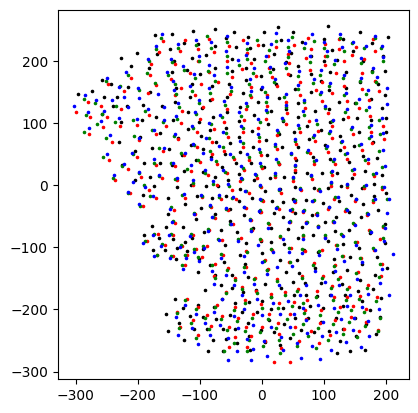

In [119]:
plt.scatter(cell_centres_0[:,0]-np.mean(cell_centres_0[:,0]), cell_centres_0[:,1]-np.mean(cell_centres_0[:,1]), marker='.', c='black', s=10)
plt.scatter(cell_centres_300[:,0]-np.mean(cell_centres_300[:,0]), cell_centres_300[:,1]-np.mean(cell_centres_300[:,1]), marker='.', c='red', s=10)
#plt.scatter(cell_centres_600[:,0], cell_centres_600[:,1], marker='.', c='orange', s=10)
#plt.scatter(cell_centres_900[:,0], cell_centres_900[:,1], marker='.', c='yellow', s=10)
plt.scatter(cell_centres_1800[:,0]-np.mean(cell_centres_1800[:,0]), cell_centres_1800[:,1]-np.mean(cell_centres_1800[:,1]), marker='.', c='green', s=10)
plt.scatter(cell_centres_3600[:,0]-np.mean(cell_centres_3600[:,0]), cell_centres_3600[:,1]-np.mean(cell_centres_3600[:,1]), marker='.', c='blue', s=10)
plt.gca().set_aspect('equal')

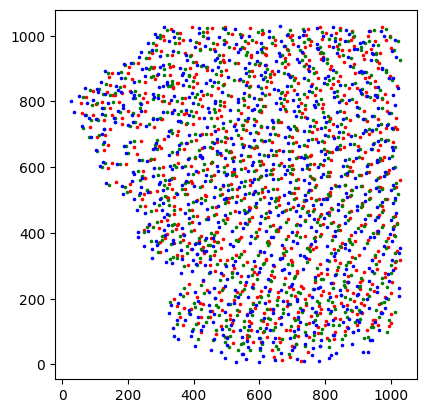

In [79]:

plt.scatter(R_300[:,0], R_300[:,1], marker='.', c='red', s=10)
plt.scatter(R_1800[:,0], R_1800[:,1], marker='.', c='green', s=10)
plt.scatter(R_3600[:,0], R_3600[:,1], marker='.', c='blue', s=10)
plt.gca().set_aspect('equal')

In [80]:
data_t_0['cell_centres_x']=cell_centres_0[:,0]
data_t_0['cell_centres_y']=cell_centres_0[:,1]
data_t_300['cell_centres_x']=cell_centres_300[:,0]
data_t_300['cell_centres_y']=cell_centres_300[:,1]
data_t_600['cell_centres_x']=cell_centres_600[:,0]
data_t_600['cell_centres_y']=cell_centres_600[:,1]
data_t_900['cell_centres_x']=cell_centres_900[:,0]
data_t_900['cell_centres_y']=cell_centres_900[:,1]
data_t_1800['cell_centres_x']=cell_centres_1800[:,0]
data_t_1800['cell_centres_y']=cell_centres_1800[:,1]

In [81]:
map_data_t0=data_t_0[data_t_0['cell_id'].isin(cell_map[:,0])]
map_data_t300=data_t_300[data_t_300['cell_id'].isin(cell_map[:,1])]

map_data_t300a=data_t_300[data_t_300['cell_id'].isin(cell_map_300_600[:,0])]
map_data_t600=data_t_600[data_t_600['cell_id'].isin(cell_map_300_600[:,1])]

map_data_t600a=data_t_600[data_t_600['cell_id'].isin(cell_map_600_900[:,0])]
map_data_t900=data_t_900[data_t_900['cell_id'].isin(cell_map_600_900[:,1])]

map_data_t900a=data_t_900[data_t_900['cell_id'].isin(cell_map_900_1800[:,0])]
map_data_t1800=data_t_1800[data_t_1800['cell_id'].isin(cell_map_900_1800[:,1])]

In [82]:
map_data_t300['cell_centres_x'][id_map[0]]
map_data_t300a['cell_centres_x'][73]

347.0

In [83]:
id_map= {cell_map[i,0]: cell_map[i,1] for i in range(len(cell_map))}
id_map_300_600={cell_map_300_600[i,0]: cell_map_300_600[i,1] for i in range(len(cell_map_300_600))}
id_map_600_900={cell_map_600_900[i,0]: cell_map_600_900[i,1] for i in range(len(cell_map_600_900))}
id_map_900_1800={cell_map_900_1800[i,0]: cell_map_900_1800[i,1] for i in range(len(cell_map_900_1800))}

np.where(np.unique(cell_map_900_1800[:,1], return_counts=True)[1]>1)

np.unique(cell_map_900_1800[:,1], return_counts=True)[0][[ 41, 124, 128, 201]]
#id_map_300_600[73]

array([ 43., 129., 133., 207.])

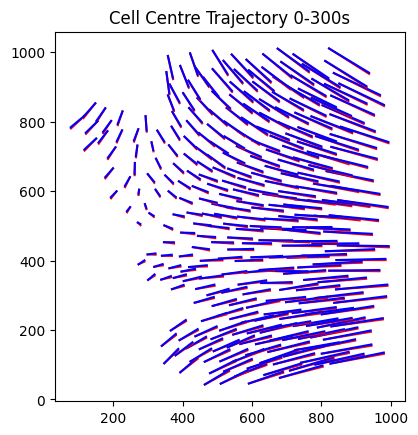

In [84]:
for i in map_data_t0['cell_id']:
    plt.plot([map_data_t0['cell_centres_x'][i], map_data_t300['cell_centres_x'][id_map[i]]
], [map_data_t0['cell_centres_y'][i], map_data_t300['cell_centres_y'][id_map[i]]-3.586292759
], c='red')
    
    plt.plot([map_data_t0['cell_centres_x'][i], map_data_t300['cell_centres_x'][id_map[i]]
], [map_data_t0['cell_centres_y'][i], map_data_t300['cell_centres_y'][id_map[i]]
], c='blue')
    #plt.scatter(map_data_t0['cell_centres_x'][i], map_data_t0['cell_centres_y'][i], color='green', marker='.')
    #plt.scatter( map_data_t300['cell_centres_x'][id_map[i]],  map_data_t300['cell_centres_y'][id_map[i]], color='red', marker='.')

plt.gca().set_aspect('equal')
plt.title('Cell Centre Trajectory 0-300s')
#plt.savefig('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Relaxation\\20230126/stretch_change_dots.png', dpi=300)
plt.show()


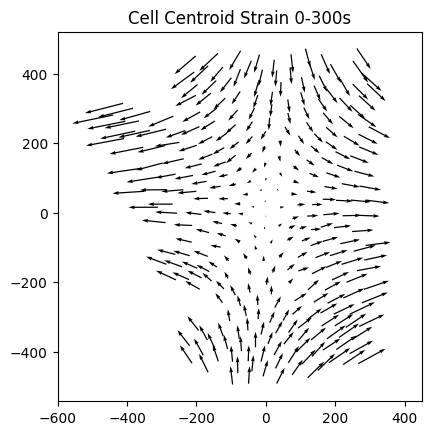

In [145]:
dx= [(map_data_t300['cell_centres_x'][id_map[i]])-map_data_t0['cell_centres_x'][i] for i in map_data_t0['cell_id']]
dy=[(map_data_t300['cell_centres_y'][id_map[i]])-map_data_t0['cell_centres_y'][i] for i in map_data_t0['cell_id']]

dx=dx-np.mean(dx)
dy=dy-np.mean(dy)

mag=np.sqrt(np.asarray(dx)**2+np.asarray(dy)**2)
# for i in map_data_t0['cell_id']:
#     plt.plot([map_data_t0['cell_centres_x'][i], map_data_t300['cell_centres_x'][id_map[i]]+0.548816005
# ], [map_data_t0['cell_centres_y'][i], map_data_t300['cell_centres_y'][id_map[i]]-3.586292759
# ], c='red')
plt.quiver(map_data_t0['cell_centres_x']-np.mean(map_data_t0['cell_centres_x']),map_data_t0['cell_centres_y']-np.mean(map_data_t0['cell_centres_y']), dx, dy,units='xy', angles='xy', scale=1, zorder=10)
plt.gca().set_aspect('equal')
plt.xlim(-600, 450)
plt.title('Cell Centroid Strain 0-300s')
plt.savefig('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Relaxation\\20230126/Strain_quiver.png', dpi=300)


In [138]:
dx

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

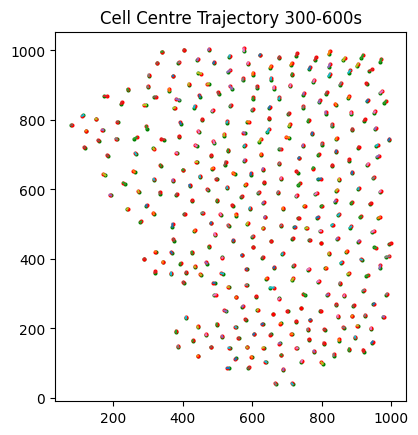

In [86]:
for i in map_data_t300a['cell_id']:
    plt.plot([map_data_t300a['cell_centres_x'][i], map_data_t600['cell_centres_x'][id_map_300_600[i]]], [map_data_t300a['cell_centres_y'][i], map_data_t600['cell_centres_y'][id_map_300_600[i]]])
    plt.scatter(map_data_t300a['cell_centres_x'][i], map_data_t300a['cell_centres_y'][i], color='green', marker='.', s=15)
    plt.scatter( map_data_t600['cell_centres_x'][id_map_300_600[i]],  map_data_t600['cell_centres_y'][id_map_300_600[i]], color='red', marker='.', s=15)

plt.gca().set_aspect('equal')
plt.title('Cell Centre Trajectory 300-600s')
plt.savefig('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Relaxation\\20230126/stretch_change_300_600.png', dpi=300)

Text(0.5, 1.0, 'Cell Centre Trajectory 300-600s')

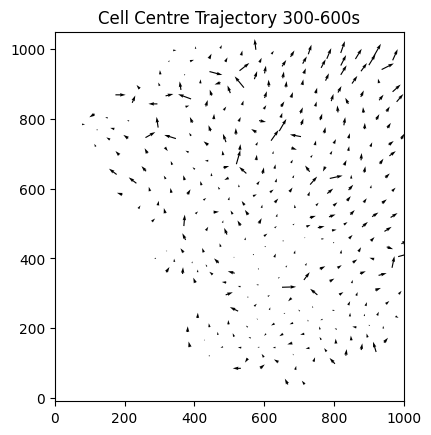

In [87]:
dx_300_600= [(map_data_t600['cell_centres_x'][id_map_300_600[i]])-map_data_t300a['cell_centres_x'][i] for i in map_data_t300a['cell_id']]
dy_300_600=[(map_data_t600['cell_centres_y'][id_map_300_600[i]])-map_data_t300a['cell_centres_y'][i] for i in map_data_t300a['cell_id']]

mag=np.sqrt(np.asarray(dx)**2+np.asarray(dy)**2)
# for i in map_data_t0['cell_id']:
#     plt.plot([map_data_t0['cell_centres_x'][i], map_data_t300['cell_centres_x'][id_map[i]]+0.548816005
# ], [map_data_t0['cell_centres_y'][i], map_data_t300['cell_centres_y'][id_map[i]]-3.586292759
# ], c='red')
plt.quiver(map_data_t300a['cell_centres_x'],map_data_t300a['cell_centres_y'], dx_300_600, dy_300_600,units='xy', angles='xy', scale=0.25, zorder=10)
plt.gca().set_aspect('equal')
plt.xlim(0,1000)
plt.title('Cell Centre Trajectory 300-600s')
#plt.savefig('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Relaxation\\20230126/stretch_change_quiver.png', dpi=300)


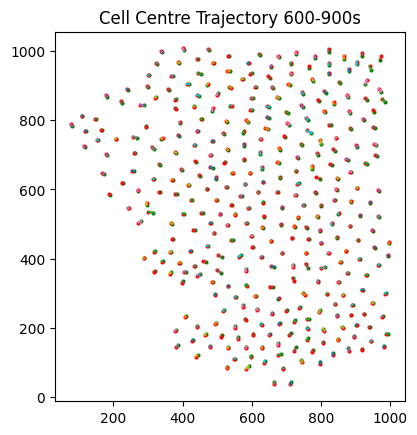

In [88]:
for i in map_data_t600a['cell_id']:
    plt.plot([map_data_t600a['cell_centres_x'][i], map_data_t900['cell_centres_x'][id_map_600_900[i]]], [map_data_t600a['cell_centres_y'][i], map_data_t900['cell_centres_y'][id_map_600_900[i]]])
    plt.scatter(map_data_t600a['cell_centres_x'][i], map_data_t600a['cell_centres_y'][i], color='green', marker='.', s=15)
    plt.scatter( map_data_t900['cell_centres_x'][id_map_600_900[i]],  map_data_t900['cell_centres_y'][id_map_600_900[i]], color='red', marker='.', s=15)

plt.gca().set_aspect('equal')
plt.title('Cell Centre Trajectory 600-900s')
plt.savefig('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Relaxation\\20230126/stretch_change_600_900.png', dpi=300)

Text(0.5, 1.0, 'Cell Centre Trajectory 600-900s')

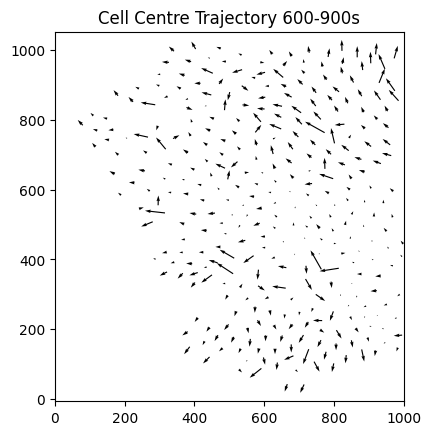

In [89]:
dx_600_900= [(map_data_t900['cell_centres_x'][id_map_600_900[i]])-map_data_t600a['cell_centres_x'][i] for i in map_data_t600a['cell_id']]
dy_600_900=[(map_data_t900['cell_centres_y'][id_map_600_900[i]])-map_data_t600a['cell_centres_y'][i] for i in map_data_t600a['cell_id']]

mag=np.sqrt(np.asarray(dx)**2+np.asarray(dy)**2)
# for i in map_data_t0['cell_id']:
#     plt.plot([map_data_t0['cell_centres_x'][i], map_data_t300['cell_centres_x'][id_map[i]]+0.548816005
# ], [map_data_t0['cell_centres_y'][i], map_data_t300['cell_centres_y'][id_map[i]]-3.586292759
# ], c='red')
plt.quiver(map_data_t600a['cell_centres_x'],map_data_t600a['cell_centres_y'], dx_600_900, dy_600_900,units='xy', angles='xy', scale=0.25, zorder=10)
plt.gca().set_aspect('equal')
plt.xlim(0,1000)
plt.title('Cell Centre Trajectory 600-900s')
#plt.savefig('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Relaxation\\20230126/stretch_change_quiver.png', dpi=300)


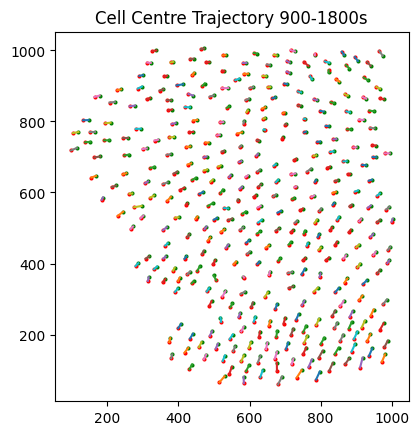

In [90]:
for i in map_data_t900a['cell_id']:
    plt.plot([map_data_t900a['cell_centres_x'][i], map_data_t1800['cell_centres_x'][id_map_900_1800[i]]], [map_data_t900a['cell_centres_y'][i], map_data_t1800['cell_centres_y'][id_map_900_1800[i]]])
    plt.scatter(map_data_t900a['cell_centres_x'][i], map_data_t900a['cell_centres_y'][i], color='green', marker='.', s=15)
    plt.scatter( map_data_t1800['cell_centres_x'][id_map_900_1800[i]],  map_data_t1800['cell_centres_y'][id_map_900_1800[i]], color='red', marker='.', s=15)

plt.gca().set_aspect('equal')
plt.title('Cell Centre Trajectory 900-1800s')
plt.savefig('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Relaxation\\20230126/stretch_change_900_1800.png', dpi=300)

Text(0.5, 1.0, 'Cell Centre Trajectory 900-1800s')

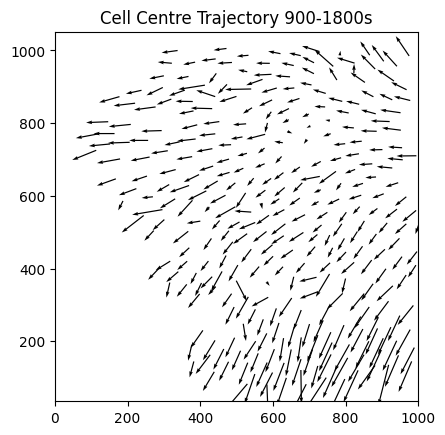

In [91]:
dx_900_1800= [(map_data_t1800['cell_centres_x'][id_map_900_1800[i]])-map_data_t900a['cell_centres_x'][i] for i in map_data_t900a['cell_id']]
dy_900_1800=[(map_data_t1800['cell_centres_y'][id_map_900_1800[i]])-map_data_t900a['cell_centres_y'][i] for i in map_data_t900a['cell_id']]

mag=np.sqrt(np.asarray(dx)**2+np.asarray(dy)**2)
# for i in map_data_t0['cell_id']:
#     plt.plot([map_data_t0['cell_centres_x'][i], map_data_t300['cell_centres_x'][id_map[i]]+0.548816005
# ], [map_data_t0['cell_centres_y'][i], map_data_t300['cell_centres_y'][id_map[i]]-3.586292759
# ], c='red')
plt.quiver(map_data_t900a['cell_centres_x'],map_data_t900a['cell_centres_y'], dx_900_1800, dy_900_1800,units='xy', angles='xy', scale=0.25, zorder=10)
plt.gca().set_aspect('equal')
plt.xlim(0,1000)
plt.title('Cell Centre Trajectory 900-1800s')
#plt.savefig('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Relaxation\\20230126/stretch_change_quiver.png', dpi=300)


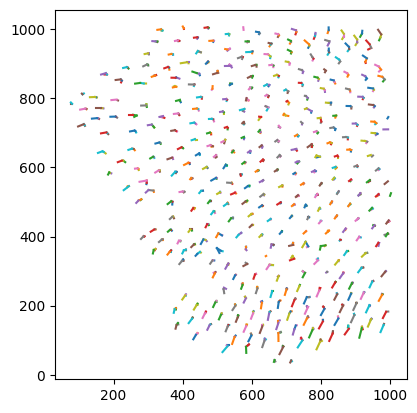

In [92]:
#for i in map_data_t0['cell_id']:
    #plt.plot([map_data_t0['cell_centres_x'][i], map_data_t300['cell_centres_x'][id_map[i]]], [map_data_t0['cell_centres_y'][i], map_data_t300['cell_centres_y'][id_map[i]]])
for i in map_data_t300a['cell_id']:
    plt.plot([map_data_t300a['cell_centres_x'][i], map_data_t600['cell_centres_x'][id_map_300_600[i]]], [map_data_t300a['cell_centres_y'][i], map_data_t600['cell_centres_y'][id_map_300_600[i]]])
for i in map_data_t600a['cell_id']:    
    plt.plot([map_data_t600a['cell_centres_x'][i], map_data_t900['cell_centres_x'][id_map_600_900[i]]], [map_data_t600a['cell_centres_y'][i], map_data_t900['cell_centres_y'][id_map_600_900[i]]])
for i in map_data_t900a['cell_id']:
    plt.plot([map_data_t900a['cell_centres_x'][i], map_data_t1800['cell_centres_x'][id_map_900_1800[i]]], [map_data_t900a['cell_centres_y'][i], map_data_t1800['cell_centres_y'][id_map_900_1800[i]]])

plt.gca().set_aspect('equal')

In [93]:
area_change_0=np.asarray([map_data_t0['cell_area_microns'][i] for i in cell_map[:,0]])-np.asarray([map_data_t300['cell_area_microns'][i] for i in cell_map[:,1]])
area_change_300=-np.asarray([map_data_t0['cell_area_microns'][i] for i in cell_map[:,0]])+np.asarray([map_data_t300['cell_area_microns'][i] for i in cell_map[:,1]])

circ_change_0=np.asarray([map_data_t0['circularity'][i] for i in cell_map[:,0]])-np.asarray([map_data_t300['circularity'][i] for i in cell_map[:,1]])
circ_change_300=-np.asarray([map_data_t0['circularity'][i] for i in cell_map[:,0]])+np.asarray([map_data_t300['circularity'][i] for i in cell_map[:,1]])

In [94]:
R_300[np.array(map_data_t300['cell_id']).astype(int)]

C_300[np.array(map_data_t300['cell_id']).astype(int)]

C_300_map=C_300
for i in range(len(C_300)):
    if i not in map_data_t300['cell_id']:
        C_300_map[i,:]=0

In [95]:
R_300_map=[]
for i in range(len(R_300)):
    if np.sum(C_300_map[:, i])==0:
        R_300_map.append(i)

In [96]:
len(R_300_map)
R_300_new=R_300
R_300_new[R_300_map]=0

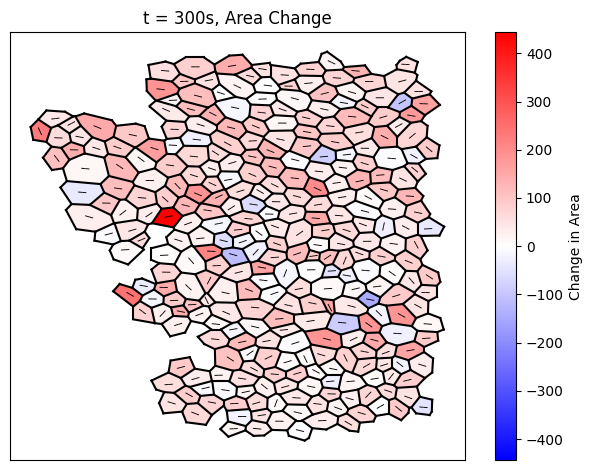

In [104]:
plot_variable=area_change_300 ###Set variable to plot

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

## For colormap of continuous data
polys=plot_polys(C_300, R_300, cell_centres_300)
polys.set_facecolor('black')
ax.add_collection(polys) 

polys=plot_polys(C_300_map, R_300, cell_centres_300)
#polys.set_facecolor('black')
polys.set_array(plot_variable)
polys.set_cmap('bwr') ###set polygon colourmap here
polys.set_clim(-np.max(abs(area_change_300)), np.max(abs(area_change_300)))
ax.add_collection(polys) 
cbar = fig.colorbar(polys, ax=ax)
cbar.ax.set_ylabel('Change in Area', rotation=90) ###set colorbar label



##for discrete data colormap

# polys=plot_polys(C, R, cell_centres)
# polys.set_array(plot_variable)
# ax.add_collection(polys) 

# cmap = mpl.cm.jet ###choose colour map to discretise here

# bounds = np.arange(plot_variable.min()-0.5, plot_variable.max()+1.5, 1)
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# polys.set_cmap(cmap) 
# cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
#              ax=ax, ticks=np.arange(plot_variable.min(), plot_variable.max()+1, 1))
# cbar.ax.set_ylabel('Number of sides', rotation=90) ###set colorbar label

## For binary colouring

# threshold=0 ###Choose threhold value
# lowcolour='blue' ###Choose low value colour here
# highcolour='red' ###Choose high value colour here
# polys_low, polys_high=plot_binary_polys(C, R, cell_centres,data['cell_P_eff_nd'], threshold)
# polys_low.set_facecolor(lowcolour) 
# ax.add_collection(polys_low)
# polys_high.set_facecolor(highcolour) 
# ax.add_collection(polys_high)




ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)

## Add edges to plot 
plot_edges(A_300, R_300_new)

## Uncomment to plot cell centres or shape/stress alignment

#plot_cell_centres(cell_centres)

#plot_cell_id(cell_centres_300)

#plot_alignment_axis(cell_centres,np.asarray(data['major_stress_axis_alignment_rads']))

plot_alignment_axis(np.transpose(np.vstack((np.asarray(map_data_t300['cell_centres_x']),np.asarray(map_data_t300['cell_centres_y'])))),np.asarray(map_data_t300['major_shape_axis_alignment_rads']))


ax.set_title("t = {}s, {}".format(300,'Area Change')) ###change title
plt.gca().set_aspect('equal')
plt.tight_layout()

##uncomment to save
plt.savefig('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Relaxation\\20230126/area_change_0_300.png', dpi=300)

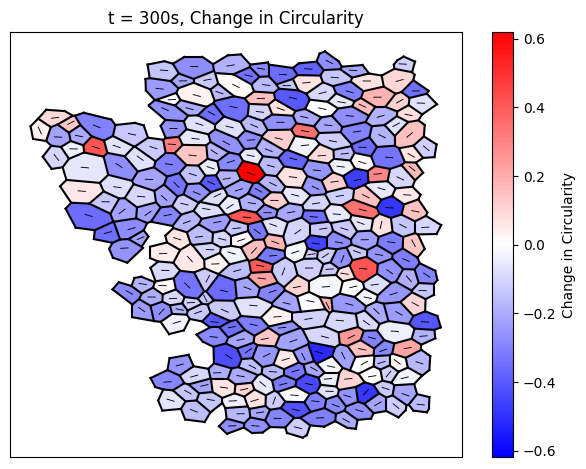

In [105]:
plot_variable=circ_change_300 ###Set variable to plot

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

## For colormap of continuous data
polys=plot_polys(C_300, R_300, cell_centres_300)
polys.set_facecolor('black')
ax.add_collection(polys) 

polys=plot_polys(C_300_map, R_300, cell_centres_300)
#polys.set_facecolor('black')
polys.set_array(plot_variable)
polys.set_cmap('bwr') ###set polygon colourmap here
polys.set_clim(-np.max(abs(circ_change_300)), np.max(abs(circ_change_300)))
ax.add_collection(polys) 
cbar = fig.colorbar(polys, ax=ax)
cbar.ax.set_ylabel('Change in Circularity', rotation=90) ###set colorbar label



##for discrete data colormap

# polys=plot_polys(C, R, cell_centres)
# polys.set_array(plot_variable)
# ax.add_collection(polys) 

# cmap = mpl.cm.jet ###choose colour map to discretise here

# bounds = np.arange(plot_variable.min()-0.5, plot_variable.max()+1.5, 1)
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# polys.set_cmap(cmap) 
# cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
#              ax=ax, ticks=np.arange(plot_variable.min(), plot_variable.max()+1, 1))
# cbar.ax.set_ylabel('Number of sides', rotation=90) ###set colorbar label

## For binary colouring

# threshold=0 ###Choose threhold value
# lowcolour='blue' ###Choose low value colour here
# highcolour='red' ###Choose high value colour here
# polys_low, polys_high=plot_binary_polys(C, R, cell_centres,data['cell_P_eff_nd'], threshold)
# polys_low.set_facecolor(lowcolour) 
# ax.add_collection(polys_low)
# polys_high.set_facecolor(highcolour) 
# ax.add_collection(polys_high)




ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)

## Add edges to plot 
plot_edges(A_300, R_300_new)

## Uncomment to plot cell centres or shape/stress alignment

#plot_cell_centres(cell_centres)

#plot_cell_id(cell_centres_300)

#plot_alignment_axis(cell_centres,np.asarray(data['major_stress_axis_alignment_rads']))

plot_alignment_axis(np.transpose(np.vstack((np.asarray(map_data_t300['cell_centres_x']),np.asarray(map_data_t300['cell_centres_y'])))),np.asarray(map_data_t300['major_shape_axis_alignment_rads']))


ax.set_title("t = {}s, {}".format(300,'Change in Circularity')) ###change title
plt.gca().set_aspect('equal')
plt.tight_layout()

##uncomment to save
plt.savefig('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Relaxation\\20230126/cir_change_0_300.png', dpi=300)

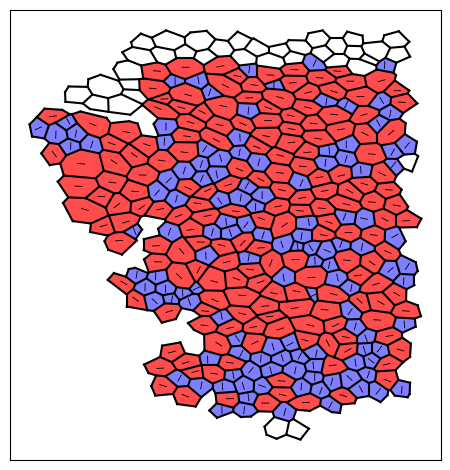

In [186]:
plot_variable=map_data_t300['cell_P_eff_nd'] ###Set variable to plot

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

## For colormap of continuous data


# polys=plot_polys(C_300_map, R_300, cell_centres_300)
# #polys.set_facecolor('black')
# polys.set_array(plot_variable)
# polys.set_cmap('bwr') ###set polygon colourmap here
# polys.set_clim(-np.max(abs(area_change_300)), np.max(abs(area_change_300)))
# ax.add_collection(polys) 
# cbar = fig.colorbar(polys, ax=ax)
#cbar.ax.set_ylabel('Circularity', rotation=90) ###set colorbar label



##for discrete data colormap

# polys=plot_polys(C_300, R_300, cell_centres_300)
# polys.set_array(plot_variable)
# ax.add_collection(polys) 

# cmap = mpl.cm.jet ###choose colour map to discretise here

# bounds = np.arange(plot_variable.min()-0.5, plot_variable.max()+1.5, 1)
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# polys.set_cmap(cmap) 
# cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
#              ax=ax, ticks=np.arange(plot_variable.min(), plot_variable.max()+1, 1))
# cbar.ax.set_ylabel('Number of sides', rotation=90) ###set colorbar label

## For binary colouring

threshold=0 ###Choose threhold value
lowcolour='blue' ###Choose low value colour here
highcolour='red' ###Choose high value colour here
polys_low, polys_high=plot_binary_polys(C_300, R_300, cell_centres_300,data_t_300['cell_P_eff_nd'], threshold)
polys_low.set_facecolor(lowcolour) 
ax.add_collection(polys_low)
polys_high.set_facecolor(highcolour) 
ax.add_collection(polys_high)




ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)

## Add edges to plot 
plot_edges(A_300, R_300_)

## Uncomment to plot cell centres or shape/stress alignment

#plot_cell_centres(cell_centres)

#plot_cell_id(cell_centres_300)

#plot_alignment_axis(cell_centres,np.asarray(data['major_stress_axis_alignment_rads']))

#plot_alignment_axis(np.transpose(np.vstack((np.asarray(map_data_t300['cell_centres_x']),np.asarray(map_data_t300['cell_centres_y'])))),np.asarray(map_data_t300['major_shape_axis_alignment_rads']))
plot_alignment_axis(np.transpose(np.vstack((np.asarray(map_data_t300['cell_centres_x']),np.asarray(map_data_t300['cell_centres_y'])))),np.asarray(map_data_t300['major_stress_axis_alignment_rads']))

#ax.set_title("t = {}s, {}".format(300,'Cell ID')) ###change title
plt.gca().set_aspect('equal')
plt.tight_layout()

In [ ]:
c